In [67]:
# Import the pandas package, "read_csv" function to read  the labeled training data
%matplotlib inline
import pandas as pd       
import re
from bs4 import BeautifulSoup
import nltk
from urllib2 import urlopen 
#nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords

In [58]:
train1 = pd.read_csv("train@urlpandaslower.csv", header=0, \
                    delimiter=",", quoting=0)

In [61]:
sm = train1["Sentiment"]

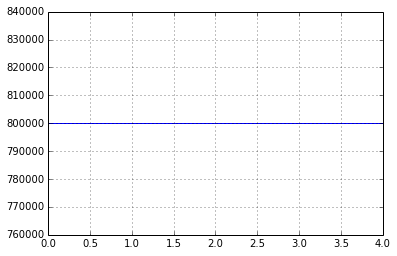

In [69]:
sm.value_counts().sort_index().plot()

In [51]:
train = train1.head(6000)

In [52]:
print train.head()

   Sentiment     Query             User  \
0          0  no_query  _thespecialone_   
1          0  no_query    scotthamilton   
2          0  no_query         mattycus   
3          0  no_query          ellectf   
4          0  no_query           karoli   

                                             Message  
0   url - awww, that's a bummer.  you shoulda got...  
1  is upset that he can't update his facebook by ...  
2   i dived many times for the ball. managed to s...  
3    my whole body feels itchy and like its on fire   
4   no, it's not behaving at all. i'm mad. why am...  


In [53]:
#train = train.dropna()

In [54]:
train.shape

(6000, 4)

In [55]:
def message_to_words(raw_message ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTMLL
    #message_text = BeautifulSoup(raw_message).get_text() 
    #
    # 2. Remove non-letter
    #for index, row in raw_message.iterrows():
    
    letters_only = re.sub("[^a-zA-Z]", " ", raw_message ) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [56]:
clean_message = message_to_words( str(train["Message"][1]) )
print clean_message

upset update facebook texting might cry result school today also blah


In [ ]:
# Get the number of reviews based on the dataframe column size
num_message = train["Message"].size

# Initialize an empty list to hold the clean reviews
#clean_train_message = []
print "Cleaning and parsing the training set tweet messages...\n"
clean_train_message = []
for i in xrange( 0, num_message ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print "Meessage %d of %d\n" % ( i+1, num_message )                                                                    
    clean_train_message.append( message_to_words( str(train["Message"][i]) ))



In [40]:
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_message)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [41]:
print train_data_features.shape

(6000, 5000)


In [42]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
#print vocab

In [43]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
#for tag, count in zip(vocab, dist):
    #print count, tag

In [44]:
print "Training the SVM.."
from sklearn import svm
# Initialize a Random Forest classifier with 100 trees
#forest = RandomForestClassifier(n_estimators = 100) 
sv = svm.SVC()

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
sv = sv.fit( train_data_features, train["Sentiment"] )

Training the SVM..


ValueError: The number of classes has to be greater than one; got 1

In [12]:
#import pickle
#sForest_test_save = pickle.dumps(forest)
#clf2 = pickle.loads(s)


In [14]:
#from sklearn.externals import joblib
#joblib.dump(forest, 'filename.pkl') 

In [15]:
# Read the test data
test = pd.read_csv("test@urlpandaslower.csv", header=0, delimiter=",", \
                   quoting=0 )

In [17]:


y_true = test["Sentiment"]

# Verify that there are 25,000 rows and 2 columns
print test.shape

# Create an empty list and append the clean reviews one by one
num_messages = len(test["Message"])
clean_test_messages = [] 

print "Cleaning and parsing the test messages...\n"
for i in xrange(0,num_messages):
    if( (i+1) % 1000 == 0 ):
        print "Message %d of %d\n" % (i+1, num_messages)
    clean_message = message_to_words( str(test["Message"][i]) )
    clean_test_messages.append( clean_message )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_messages)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = multinomialNB.predict(test_data_features)


(498, 4)
Cleaning and parsing the test messages...



In [18]:
#test = train.head(100)

In [19]:
y_true = test["Sentiment"]


In [20]:
print test.shape

(498, 4)


In [23]:
# Read the test data
#test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
#                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns

# Create an empty list and append the clean reviews one by one
num_message_test = len(test["Message"])
clean_test_messages = [] 

print "Cleaning and parsing the test set movie reviews...\n"
for i in xrange(0,num_message_test):
    if( (i+1) % 1000 == 0 ):
        print "Review %d of %d\n" % (i+1, num_message)
    clean_message = message_to_words( str(test["Message"][i]) )
    clean_test_messages.append( clean_message )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_messages)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

Cleaning and parsing the test set movie reviews...



NameError: name 'forest' is not defined

In [21]:
import numpy as np
from sklearn.metrics import accuracy_score
y_true = test["Sentiment"]


In [42]:
#y_true = y_true.fillna(value=0)
#y_true = y_true.toarray()

In [43]:
#esult = result.fillna(value=0)

In [22]:
accuracy_score(y_true, result)

0.35542168674698793

In [ ]:
# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )